In [2]:
#初始化
#!font_url = "https://www.twfont.com/chinese/font/Calligraphy.ttf"
# normal mono https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
#@!wget  -O "target.ttf" "https://www.twfont.com/chinese/font/Calligraphy.ttf"
#!pip install imutils, opencv
import numpy as np
import cv2
import matplotlib.pyplot as plt
import imutils
import os
import re
from PIL import Image, ImageDraw, ImageFont

directory = os.getcwd()
print("here is the project path")
print(directory)

DIR = directory+'\output'+"/"
DIR_black = DIR+"\BlackNwhite/"
DIR_thresh = DIR+'\Thresh/'
DIR_canny =  DIR+'\Canny/'


# Check whether the specified path exists or not
isExist = os.path.exists(DIR)
if not isExist:
    print(f"{DIR} is not exist, creating...")
    # Create a new directory because it does not exist 
    os.makedirs(DIR)
    print("The new directory is created!")
    
isExist = os.path.exists(DIR_black)
if not isExist:
    print(f"{DIR_black} is not exist, creating...")
    # Create a new directory because it does not exist 
    os.makedirs(DIR_black)
    print("The new directory is created!")

isExist = os.path.exists(DIR_thresh)
if not isExist:
    print(f"{DIR_thresh} is not exist, creating...")
    # Create a new directory because it does not exist 
    os.makedirs(DIR_thresh)
    print("The new directory is created!")
    
isExist = os.path.exists(DIR_canny)
if not isExist:
    print(f"{DIR_canny} is not exist, creating...")
    # Create a new directory because it does not exist 
    os.makedirs(DIR_canny)
    print("The new directory is created!")


here is the project path
C:\Users\TKU-LifeLab03\Desktop\work


In [3]:
#文本處理

##create a text.txt and paste stories inside
with open('text.txt', 'r', encoding = 'utf8') as f, open("new_file.txt", "w", encoding = 'utf8') as n:
    x = f.read()
    result = re.sub(".[\u3400-\u4db5]", "", x, 0, re.IGNORECASE )
    result = re.sub('※|》|\n|《|\t|。|\u3000|」|「|，|\s|：|\n|\？|！|、|；|『|』', '', result)
    result = re.sub('○','零',result)
    n.write(result)
    chars = list(result)
#print(result)

#print(chars)
print("txt ready")

txt ready


In [ ]:
#

In [4]:
#以文本產生字圖
def remove_dup(x):
  return list(dict.fromkeys(x))
def split(word):
  return [char for char in word]

#GENERATE IMAGE 
#matplotlib.font_manager.fontManager.addfont('taipei_sans_tc_beta.ttf')
#print(img_name)
#print(chars)
width = 300
height = 300
chars = remove_dup(chars)

#print(chars)
for i in range(0,len(chars)):
  #print(i)
    word = chars[i]

# create Image object
    img_name = word+".png"
    text1 = 'Create Feature Image'
    text2 = 'With Python'
    color = 'purple' #grey,light_blue,blue,orange,purple,yellow,green
    font = 'target.ttf'
    img  = Image.new( mode = "RGB", size = (width, height), color = (0, 255, 255) )
    I1 = ImageDraw.Draw(img)
    myFont = ImageFont.truetype(font, 300)
    I1.text((0,0), word, font=myFont, fill =(0, 0, 0))

    directory = os.getcwd()
    #print()
    directory2 = directory+"/output/"
    img.save(str(directory2+img_name),"PNG")

print("Images of char Ready")

Images of char Ready


In [67]:
#make images into black and white
#黑白

for i in range(0,(len(os.listdir(DIR)))):
    if(os.listdir(DIR)[i])!=None and ".png" in (os.listdir(DIR)[i]) or ".jpeg" in (os.listdir(DIR)[i])or ".jpg" in (os.listdir(DIR)[i]):
        #print(f"{i}:{DIR+os.listdir(DIR)[i]}")
        #print(np.fromfile(DIR+os.listdir(DIR)[i],dtype=np.uint8))
        src = cv2.imdecode(np.fromfile(DIR+os.listdir(DIR)[i],dtype=np.uint8),-1) 
        #print((src))
        image = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
        #Linux/mac
        #cv2.imwrite(DIR_black+os.listdir(DIR)[i], image)
        #Windows
        cv2.imencode('.png', image)[1].tofile(DIR_black+os.listdir(DIR)[i])
print("Done")


Done


In [68]:
# Thresh 二極
"""
img1 = cv2.imread(DIR_black+'/令.png', 0 )
thresh, img2 = cv2.threshold( img1, 127, 255, 
               cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU )
print("example here:")
print( "Threshold =", thresh )
#cv2.imshow( "Original Image",  img2 )	
#cv2.waitKey( 0 )

plt.figure("Correct")
plt.imshow(imutils.opencv2matplotlib(img2))
plt.show()
"""
#now apply to all images

#print(DIR_black)
for i in range(0,(len(os.listdir(DIR_black)))):
    if(os.listdir(DIR_black)[i])!=None and ".png" in (os.listdir(DIR_black)[i]) or ".jpeg" in (os.listdir(DIR_black)[i])or ".jpg" in (os.listdir(DIR_black)[i]):
        #print(f"{i}:{DIR_black+os.listdir(DIR_black)[i]}")
        #img1 = cv2.imread(DIR_black+os.listdir(DIR_black)[i], 0 )
        img1 = cv2.imdecode(np.fromfile(DIR_black+os.listdir(DIR_black)[i],dtype=np.uint8),-1) 
        thresh, img2 = cv2.threshold( img1, 127, 255, 
               cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU )
        #print(DIR+'Thresh/'+os.listdir(DIR_black)[i])

        #src = cv2.imread(DIR+os.listdir(DIR)[i]) 
        #image = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
        #cv2.imwrite(DIR_thresh+os.listdir(DIR_black)[i], img2)
        cv2.imencode('.png', img2)[1].tofile(DIR_thresh+os.listdir(DIR_black)[i])
        
print("Done")


Done


In [69]:
#canny骨架
"""
img1 = cv2.imread(DIR_thresh+'/令.png', -1 )
img2 = cv2.Canny( img1, 50, 200 )
#cv2.imshow( "Original Image", img1 )	
#cv2.imshow( "Canny Edge Detection", img2 )
#cv2.waitKey( 0 )

plt.figure("Correct")
plt.imshow(imutils.opencv2matplotlib(img2))
plt.show()
"""
#now apply to all images

for i in range(0,(len(os.listdir(DIR_thresh)))):
    if(os.listdir(DIR_thresh)[i])!=None and ".png" in (os.listdir(DIR_thresh)[i]) or ".jpeg" in (os.listdir(DIR_thresh)[i])or ".jpg" in (os.listdir(DIR_thresh)[i]):
        #img1 = cv2.imread(DIR_thresh+os.listdir(DIR_thresh)[i], -1 )
        img1 = cv2.imdecode(np.fromfile(DIR_thresh+os.listdir(DIR_thresh)[i],dtype=np.uint8),-1) 
        img2 = cv2.Canny( img1, 50, 200 )

        #cv2.imwrite(DIR_canny+os.listdir(DIR_thresh)[i], img2)
        cv2.imencode('.png', img2)[1].tofile(DIR_canny+os.listdir(DIR_thresh)[i])
print("Done")


Done


Morphological Image Processing
(1) Erosion
(2) Dilation
(3) Opening
(4) Closing


Please enter your choice:  2
Size of structuring element:  6


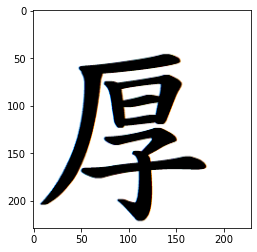

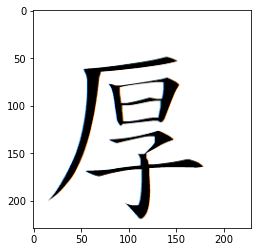

True

In [82]:
#範例(侵蝕+....)
#"C:\Users\TKU-LifeLab03\Desktop\work\output\Thresh\Amateur_0019.jpg"
DIR_kai = directory+'\samples\kai_\Amateur'+"/"
filename =  "out3.png"#'/316.PNG'
img1 = cv2.imread(filename, -1 )
plt.imshow(imutils.opencv2matplotlib(img1))

print( "Morphological Image Processing" )
print( "(1) Erosion" )
print( "(2) Dilation" )
print( "(3) Opening" )
print( "(4) Closing" )
choice = eval( input( "Please enter your choice: " ) )
size = eval( input( "Size of structuring element: " ) )
kernel = np.ones( ( size, size ), np.uint8 )
if choice == 1:
	img2 = cv2.erode( img1, kernel, iterations = 1 )
elif choice == 2:
	img2 = cv2.dilate( img1, kernel, iterations = 1 )
elif choice == 3:
	img2 = cv2.morphologyEx( img1, cv2.MORPH_OPEN, kernel )
else:
	img2 = cv2.morphologyEx( img1, cv2.MORPH_CLOSE, kernel )


plt.imshow(imutils.opencv2matplotlib(img1))

plt.figure("Correct")
plt.imshow(imutils.opencv2matplotlib(img2))
plt.show()
cv2.imwrite("out3.png",imutils.opencv2matplotlib(img2))


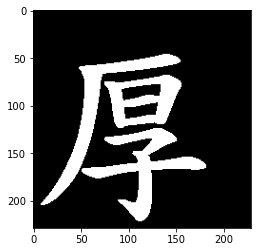

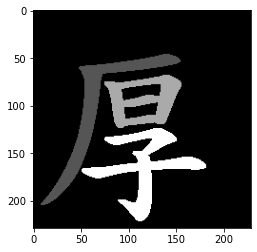

Done


In [73]:
#切筆劃-顯示~

for i in range(0,(len(os.listdir(DIR_thresh)))):
    if(os.listdir(DIR_thresh)[i])!=None and ".png" in (os.listdir(DIR_thresh)[i]) or ".jpeg" in (os.listdir(DIR_thresh)[i])or ".jpg" in (os.listdir(DIR_thresh)[i]):
        #img1 = cv2.imread(DIR_thresh+os.listdir(DIR_thresh)[i], -1 )
        img1 = cv2.imdecode(np.fromfile(DIR_thresh+os.listdir(DIR_thresh)[i],dtype=np.uint8),-1) 


#img1 = cv2.imread(DIR_thresh+'/令.png', -1 )
        n, labels = cv2.connectedComponents( img1 )
        #print( "Number of Connected Components =", n )
        cv2.normalize( labels, labels, 0, 255, cv2.NORM_MINMAX )
        img2 = np.uint8( labels )


        plt.imshow(imutils.opencv2matplotlib(img1))
        plt.figure("Correct")
        plt.imshow(imutils.opencv2matplotlib(img2))
        plt.show()
print("Done")


In [71]:
#切筆劃-檔案
#img1 = cv2.imdecode(np.fromfile(DIR_thresh+'/令.png',dtype=np.uint8),-1) 


for i in range(0,(len(os.listdir(DIR_thresh)))):
    if(os.listdir(DIR_thresh)[i])!=None and ".png" in (os.listdir(DIR_thresh)[i]) or ".jpeg" in (os.listdir(DIR_thresh)[i])or ".jpg" in (os.listdir(DIR_thresh)[i]):
        #img1 = cv2.imread(DIR_thresh+os.listdir(DIR_thresh)[i], -1 )
        
        img1 = cv2.imdecode(np.fromfile(DIR_thresh+os.listdir(DIR_thresh)[i],dtype=np.uint8),-1) 
        n, labels = cv2.connectedComponents( img1 )
        img2 = np.uint8( labels )
        #plt.imshow(imutils.opencv2matplotlib(img1))
        #plt.show()
        DIR_new = DIR+"/charApart/"+os.listdir(DIR_thresh)[i]+"_/"
        isExist = os.path.exists(DIR_new)
                
        #print(isExist)
                
        if not isExist:
            print(f"{DIR_new} is not exist, creating...")
            # Create a new directory because it does not exist 
            os.makedirs(DIR_new)
            #print("The new directory is created!")        
        for (i, label) in enumerate(np.unique(labels)):
            if(i!=0):
                #print("[INFO] label: {} (foreground)".format(i))
                labelMask = np.zeros(img1.shape,np.float32)
                mask = np.zeros(img1.shape,np.float32)
                labelMask[labels == label] = 255
                numPixels = cv2.countNonZero(labelMask)
                mask = cv2.add(mask, labelMask)

                #plt.figure("AAA")
                #plt.imshow(imutils.opencv2matplotlib(labelMask))
                #cv2.imwrite(DIR_canny+os.listdir(DIR_thresh)[i], img2)

                
                cv2.imencode('.png', labelMask)[1].tofile(DIR_new+str(i)+".png")
                #plt.show()
                


"""
for i in range(0,(len(os.listdir(DIR_thresh)))):
    if(os.listdir(DIR)[i])!=None and ".png" in (os.listdir(DIR_thresh)[i]) or ".jpeg" in (os.listdir(DIR_thresh)[i]):
        img1 = cv2.imread(DIR_thresh+os.listdir(DIR_thresh)[i], -1 )
        img2 = cv2.Canny( img1, 50, 200 )

        cv2.imwrite(DIR_canny+os.listdir(DIR_thresh)[i], img2)
print(f"Done for{}")   

"""

C:\Users\TKU-LifeLab03\Desktop\work\output//charApart/hou.png_/ is not exist, creating...


'\nfor i in range(0,(len(os.listdir(DIR_thresh)))):\n    if(os.listdir(DIR)[i])!=None and ".png" in (os.listdir(DIR_thresh)[i]) or ".jpeg" in (os.listdir(DIR_thresh)[i]):\n        img1 = cv2.imread(DIR_thresh+os.listdir(DIR_thresh)[i], -1 )\n        img2 = cv2.Canny( img1, 50, 200 )\n\n        cv2.imwrite(DIR_canny+os.listdir(DIR_thresh)[i], img2)\nprint(f"Done for{}")   \n\n'

example here:
Threshold = 131.0


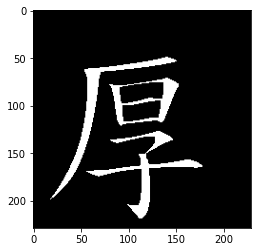

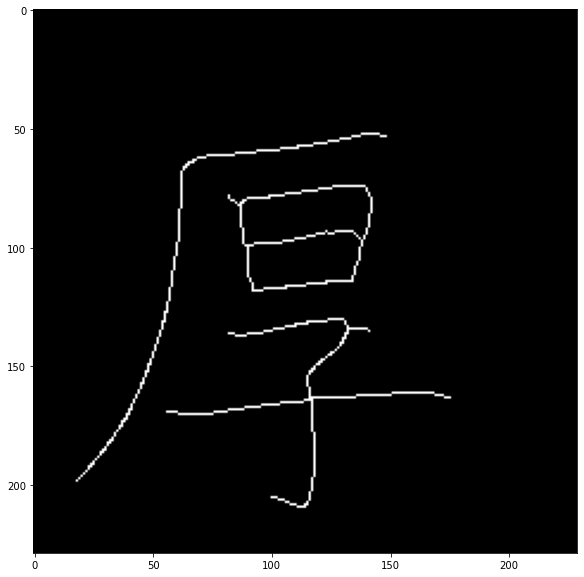

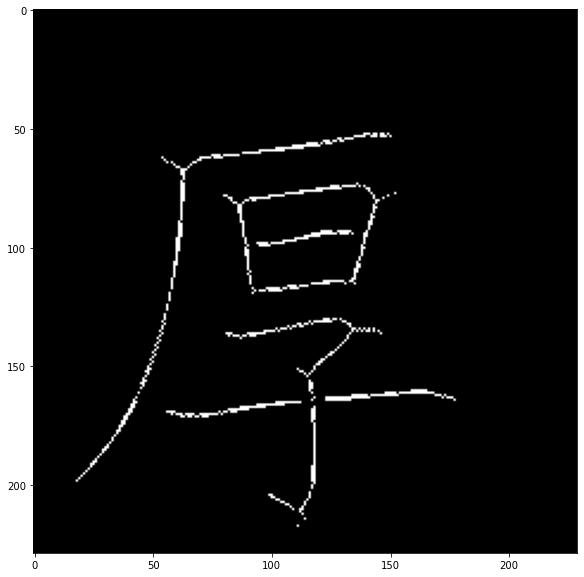

In [29]:
#骨架化(先侵蝕會有更好的效果)

img = cv2.imread("out3.png",0)



#img1 = cv2.imread(DIR_black+'/令.png', 0 )
thresh, img2 = cv2.threshold( img, 127, 255, 
               cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU )
print("example here:")
print( "Threshold =", thresh )
#cv2.imshow( "Original Image",  img2 )	
#cv2.waitKey( 0 )

plt.figure("Correct")
plt.imshow(imutils.opencv2matplotlib(img2))
plt.show()

img2 = cv2.cvtColor(img2, cv2.IMREAD_GRAYSCALE)


size = np.size(img)
skel = np.zeros(img.shape,np.uint8)
#img2 = cv2.imread("out2.png")
thinned = cv2.ximgproc.thinning(cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY))

ret,img = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
done = False

while( not done):
    eroded = cv2.erode(img,element)
    temp = cv2.dilate(eroded,element)
    temp = cv2.subtract(img,temp)
    skel = cv2.bitwise_or(skel,temp)
    img = eroded.copy()

    zeros = size - cv2.countNonZero(img)
    if zeros==size:
        done = True


plt.figure(figsize = (200,10))
cv2.imwrite("ske_img3.png",thinned)
thinned = cv2.cvtColor(thinned, cv2.COLOR_BGR2RGB)
plt.imshow(thinned)

plt.figure(figsize = (200,10))
skel = cv2.cvtColor(skel, cv2.COLOR_BGR2RGB)
plt.imshow(skel)

Threshold: 10
nonmaxSuppression:True
neighborhood: 2
Total Keypoints with nonmaxSuppression: 29
Total Keypoints without nonmaxSuppression: 29


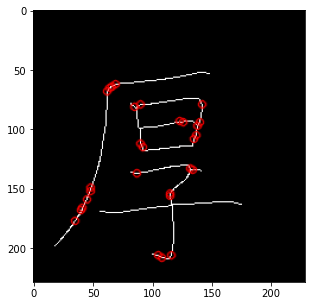

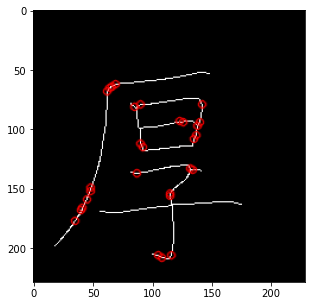

In [6]:

img = cv2.imread('ske_img3.png',0) # `<opencv_root>/samples/data/blox.jpg`
# Initiate FAST object with default values
fast = cv2.FastFeatureDetector_create()
# find and draw the keypoints
kp = fast.detect(img,None)
img2 = cv2.drawKeypoints(img, kp, None, color=(255,0,0))
# Print all default params
print( "Threshold: {}".format(fast.getThreshold()) )
print( "nonmaxSuppression:{}".format(fast.getNonmaxSuppression()) )
print( "neighborhood: {}".format(fast.getType()) )
print( "Total Keypoints with nonmaxSuppression: {}".format(len(kp)) )


plt.figure(figsize = (100,5))
plt.imshow(img2)

#cv.imwrite('fast_true.png', img2)
# Disable nonmaxSuppression
fast.setNonmaxSuppression(100000)
kp = fast.detect(img, None)
print( "Total Keypoints without nonmaxSuppression: {}".format(len(kp)) )
img3 = cv2.drawKeypoints(img, kp, None, color=(255,0,0))

plt.figure(figsize = (100,5))
plt.imshow(img3)

691


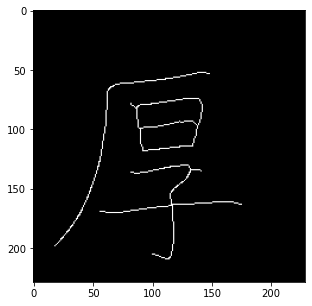

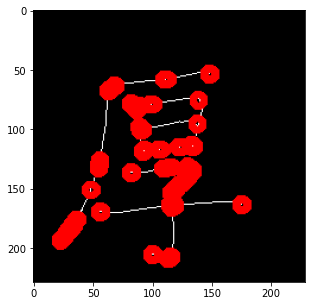

In [8]:


def harris_corner_detection( f ):
    #print("aaa")
    g = cv2.cvtColor( f, cv2.COLOR_GRAY2BGR )
    nr, nc = f.shape[:2]
    gray = np.float32( f )
    dst = cv2.cornerHarris( gray, 2, 3, 0.04 )
    dst = cv2.dilate(dst,None)

    ##########
        

    #print(dst)
    count = 0 
    for x in range( nr ):
        for y in range( nc ):
            if dst[x,y] > 0.1 * dst.max():
                count+=1
                cv2.circle( g, (y,x), 5, [255,0,0], 2 )
    thresh = 0.01*dst.max()
    
    
    
    
    #g[dst>thresh]=[0,255,0]
    print(count)
    
    
        # Create list of thresholds:
    #thresh = [130, 110, 40]


    return g
    
def main( ):
    #img1 = cv2.imread(DIR_kai+"0_word_img (1231).jpg",0) 
    img1 = cv2.imread( "ske_img3.png", 0 )
    
    img2 = harris_corner_detection( img1 )
    plt.figure(figsize = (100,5))
    image_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    plt.imshow(image_img1 )
    plt.figure(figsize = (100,5))
    plt.imshow(img2 )

main( )

In [23]:
# image path
fileName = "ske_img3.png"

# Reading an image in default mode:
inputImage = cv2.imread(fileName)
inputImageCopy = inputImage.copy()

# Convert to grayscale:
grayscaleImage = cv2.cvtColor(inputImage, cv2.COLOR_BGR2GRAY)

# Compute the skeleton:
skeleton = cv2.ximgproc.thinning(grayscaleImage, None, 1)

# Threshold the image so that white pixels get a value of 10 and
# black pixels a value of 0:
_, binaryImage = cv2.threshold(skeleton, 128, 10, cv2.THRESH_BINARY)

# Set the convolution kernel:
h = np.array([[1, 1, 1],
              [1, 10, 1],
              [1, 1, 1]])

# Convolve the image with the kernel:
imgFiltered = cv2.filter2D(binaryImage, -1, h)

-1

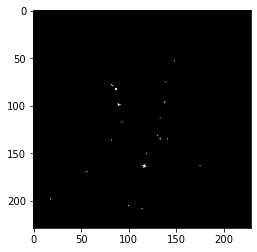

In [24]:
# Create list of thresholds:
thresh = [130, 110, 40]

# Prepare the final mask of points:
(height, width) = binaryImage.shape
pointsMask = np.zeros((height, width, 1), np.uint8)

# Perform convolution and create points mask:
for t in range(len(thresh)):
    # Get current threshold:
    currentThresh = thresh[t]
    # Locate the threshold in the filtered image:
    tempMat = np.where(imgFiltered == currentThresh, 255, 0)
    # Convert and shape the image to a uint8 height x width x channels
    # numpy array:
    tempMat = tempMat.astype(np.uint8)
    tempMat = tempMat.reshape(height,width,1)
    # Accumulate mask:
    pointsMask = cv2.bitwise_or(pointsMask, tempMat)

pointsMask_show = cv2.cvtColor(pointsMask, cv2.COLOR_BGR2RGB)
plt.imshow(pointsMask_show)
cv2.waitKey(0)

In [25]:
# Set kernel (structuring element) size:
kernelSize = 3
# Set operation iterations:
opIterations = 4
# Get the structuring element:
morphKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernelSize, kernelSize))
# Perform Dilate:
pointsMask = cv2.morphologyEx(pointsMask, cv2.MORPH_DILATE, morphKernel, None, None, opIterations, cv2.BORDER_REFLECT101)

True

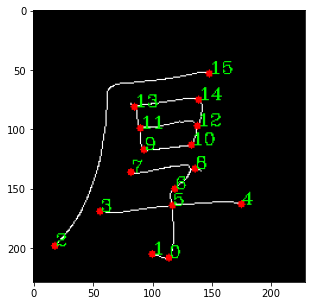

In [26]:
# Look for the outer contours (no children):
contours, _ = cv2.findContours(pointsMask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Store the points here:
pointsList = []

# Loop through the contours:
for i, c in enumerate(contours):

    # Get the contours bounding rectangle:
    boundRect = cv2.boundingRect(c)

    # Get the centroid of the rectangle:
    cx = int(boundRect[0] + 0.5 * boundRect[2])
    cy = int(boundRect[1] + 0.5 * boundRect[3])

    # Store centroid into list:
    pointsList.append( (cx,cy) )

    # Set centroid circle and text:
    color = (0, 0, 255)
    cv2.circle(inputImageCopy, (cx, cy), 3, color, -1)
    font = cv2.FONT_HERSHEY_COMPLEX
    cv2.putText(inputImageCopy, str(i), (cx, cy), font, 0.5, (0, 255, 0), 1)

    # Show image:
plt.figure(figsize = (100,5))
image_inputImageCopy = cv2.cvtColor(inputImageCopy, cv2.COLOR_BGR2RGB)

plt.imshow(image_inputImageCopy)
cv2.imwrite("out.png", image_inputImageCopy)


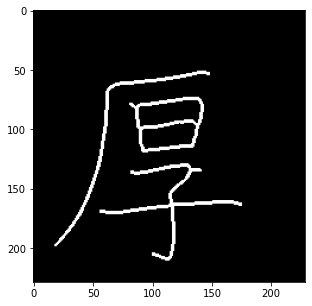

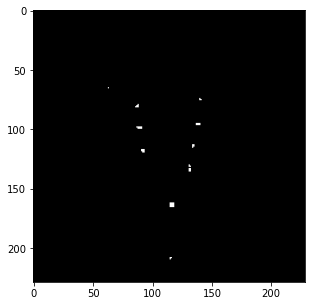

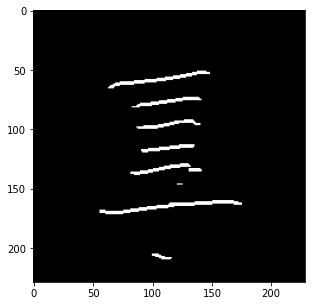

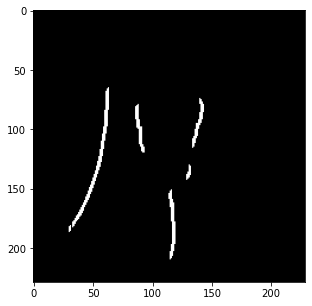

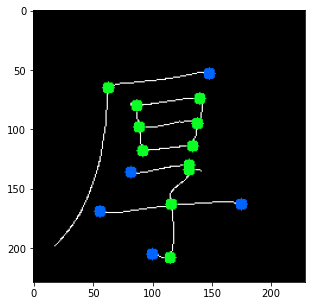

In [28]:
fileName = "ske_img3.png"

# Load image, grayscale, Gaussian blur, Otsus threshold
image = cv2.imread(fileName)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (3,3), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# Find horizonal lines
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,1))
horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=1)

# Find vertical lines
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,5))
vertical = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_kernel, iterations=1)

# Find joint intersections then the centroid of each joint
joints = cv2.bitwise_and(horizontal, vertical)
cnts = cv2.findContours(joints, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    # Find centroid and draw center point
    x,y,w,h = cv2.boundingRect(c)
    centroid, coord, area = cv2.minAreaRect(c)
    cx, cy = int(centroid[0]), int(centroid[1])
    cv2.circle(image, (cx, cy), 5, (36,255,12), -1)

# Find endpoints
corners = cv2.goodFeaturesToTrack(thresh, 5, 0.5, 10)
corners = np.int0(corners)
for corner in corners:
    x, y = corner.ravel()
    cv2.circle(image, (x, y), 5, (255,100,0), -1)
    
thresh_img = cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB)
joints_img = cv2.cvtColor(joints, cv2.COLOR_BGR2RGB)
horizontal_img = cv2.cvtColor(horizontal, cv2.COLOR_BGR2RGB)
vertical_img = cv2.cvtColor(vertical, cv2.COLOR_BGR2RGB)
image_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (100,5))
plt.imshow(thresh_img)
plt.figure(figsize = (100,5))
plt.imshow(joints_img)
plt.figure(figsize = (100,5))
plt.imshow(horizontal_img)
plt.figure(figsize = (100,5))
plt.imshow(vertical_img)
plt.figure(figsize = (100,5))
plt.imshow(image_img)


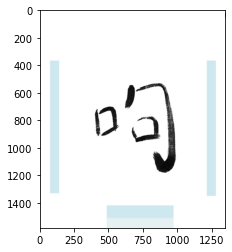

影象資訊： (1582, 1348, 3)
width: 1348 
 height: 1582 
 number: 3
vvv


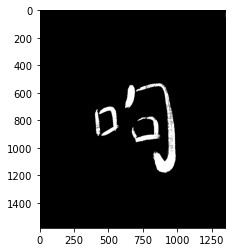

bbb
aaa


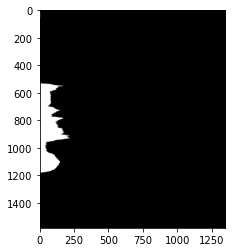

分行區域，每行資料起始位置Y： [[531, 1181]]


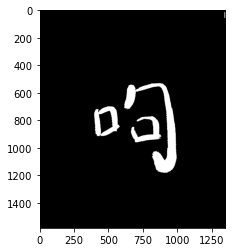

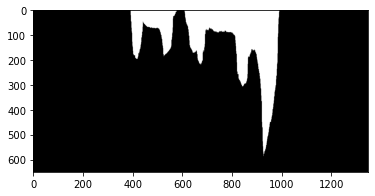

(650, 187, 3)
(650, 384, 3)


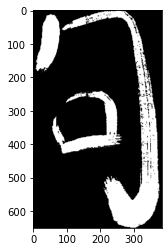

擷取矩形區域(y-start:y-end,x-start:x-end)： [[531, 1181, 392, 579], [531, 1181, 608, 992]]


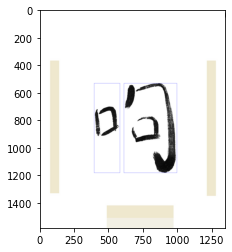

In [72]:
#小票水平分割
import cv2
import numpy as np

img = cv2.imread(r"Amateur_0005.jpg")
#cv2.imshow("Orig Image", img)

plt.imshow((img))# 輸出影象尺寸和通道資訊
plt.show()
sp = img.shape
print("影象資訊：", sp)
sz1 = sp[0]  # height(rows) of image
sz2 = sp[1]  # width(columns) of image
sz3 = sp[2]  # the pixels value is made up of three primary colors
print('width: %d \n height: %d \n number: %d' % (sz2, sz1, sz3))
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
retval, threshold_img = cv2.threshold(gray_img, 120, 255, cv2.THRESH_BINARY_INV)
#cv2.imshow("threshold_img", threshold_img)
print("vvv")
plt.imshow(imutils.opencv2matplotlib(threshold_img))
plt.show()
# 水平投影分割影象
gray_value_x = []
for i in range(sz1):
    white_value = 0
    for j in range(sz2):
        if threshold_img[i, j] == 255:
            white_value += 1
    gray_value_x.append(white_value)
#print("", gray_value_x)
# 建立影象顯示水平投影分割影象結果
print("bbb")
hori_projection_img = np.zeros((sp[0], sp[1], 1), np.uint8)
for i in range(sz1):
    for j in range(gray_value_x[i]):
        hori_projection_img[i, j] = 255
#cv2.imshow("hori_projection_img", hori_projection_img)
print("aaa")
plt.imshow(imutils.opencv2matplotlib(hori_projection_img))
plt.show()
text_rect = []
# 根據水平投影分割識別行
inline_x = 0
start_x = 0
text_rect_x = []
for i in range(len(gray_value_x)):
    if inline_x == 0 and gray_value_x[i] > 10:
        inline_x = 1
        start_x = i
    elif inline_x == 1 and gray_value_x[i] < 10 and (i - start_x) > 5:
        inline_x = 0
        if i - start_x > 10:
            rect = [start_x - 1, i + 1]
            text_rect_x.append(rect)
print("分行區域，每行資料起始位置Y：", text_rect_x)
# 每行資料分段
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 3))
dilate_img = cv2.dilate(threshold_img, kernel)
#cv2.imshow("dilate_img", dilate_img)
plt.imshow(imutils.opencv2matplotlib(dilate_img))
plt.show()
for rect in text_rect_x:
    cropImg = dilate_img[rect[0]:rect[1],0:sp[1]]  # 裁剪影象y-start:y-end,x-start:x-end
    sp_y = cropImg.shape
    # 垂直投影分割影象
    gray_value_y = []
    for i in range(sp_y[1]):
        white_value = 0
        for j in range(sp_y[0]):
            if cropImg[j, i] == 255:
                white_value += 1
        gray_value_y.append(white_value)
    # 建立影象顯示水平投影分割影象結果
    veri_projection_img = np.zeros((sp_y[0], sp_y[1], 1), np.uint8)
    for i in range(sp_y[1]):
        for j in range(gray_value_y[i]):
            veri_projection_img[j, i] = 255
    #cv2.imshow("veri_projection_img", veri_projection_img)
    plt.imshow(imutils.opencv2matplotlib(veri_projection_img))
    plt.show()
    # 根據垂直投影分割識別行
    inline_y = 0
    start_y = 0
    text_rect_y = []
    for i in range(len(gray_value_y)):
        if inline_y == 0 and gray_value_y[i] > 2:
            inline_y = 1
            start_y = i
        elif inline_y == 1 and gray_value_y[i] < 2 and (i - start_y) > 5:
            inline_y = 0
            if i - start_y > 10:
                rect_y = [start_y - 1, i + 1]
                text_rect_y.append(rect_y)
                text_rect.append([rect[0], rect[1], start_y - 1, i + 1])
                cropImg_rect = threshold_img[rect[0]:rect[1], start_y - 1:i + 1]  # 裁剪影象
                #print(imutils.opencv2matplotlib(cropImg_rect).shape)
                #cv2.imshow("cropImg_rect", cropImg_rect)
                
                
                


            
                print(imutils.opencv2matplotlib(cropImg_rect).shape)
                if (imutils.opencv2matplotlib(cropImg_rect).shape[0]*imutils.opencv2matplotlib(cropImg_rect).shape[1])>=(img.shape[0]*img.shape[1]*0.08):
                    plt.imshow(imutils.opencv2matplotlib(cropImg_rect))
                    plt.show()
                # cv2.imwrite("C:/Users/ThinkPad/Desktop/cropImg_rect.jpg",cropImg_rect)
                # break
        # break
# 在原圖上繪製截圖矩形區域
print("擷取矩形區域(y-start:y-end,x-start:x-end)：", text_rect)
rectangle_img = cv2.rectangle(img, (text_rect[0][2], text_rect[0][0]), (text_rect[0][3], text_rect[0][1]),
                              (255, 0, 0), thickness=1)
for rect_roi in text_rect:
    rectangle_img = cv2.rectangle(img, (rect_roi[2], rect_roi[0]), (rect_roi[3], rect_roi[1]), (255, 0, 0), thickness=1)
#cv2.imshow("Rectangle Image", rectangle_img)
plt.imshow(imutils.opencv2matplotlib(rectangle_img))
plt.show()

In [ ]:
import cv2
import numpy as np
import os

img = cv2.imread(r"Amateur_0005.jpg")
save_path=DIR #影象分解的每一步儲存的地址
crop_path=DIR #影象切割儲存的地址
#cv2.imshow("Orig Image", img)
plt.imshow(imutils.opencv2matplotlib(img))
plt.show()

# 輸出影象尺寸和通道資訊
sp = img.shape
print("影象資訊：", sp)
sz1 = sp[0]  # height(rows) of image
sz2 = sp[1]  # width(columns) of image
sz3 = sp[2]  # the pixels value is made up of three primary colors
print('width: %d \n height: %d \n number: %d' % (sz2, sz1, sz3))
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
retval, threshold_img = cv2.threshold(gray_img, 120, 255, cv2.THRESH_BINARY_INV)
#cv2.imshow("threshold_img", threshold_img)
plt.imshow(imutils.opencv2matplotlib(threshold_img))
plt.show()

#cv2.imwrite(os.path.join(save_path,"threshold_img.jpg"),threshold_img)

# 垂直投影分割影象
gray_value_y = []
for i in range(sz2):
    white_value = 0
    for j in range(sz1):
        if threshold_img[j, i] == 255:
            white_value += 1
    gray_value_y.append(white_value)
#print("", gray_value_y)
#建立影象顯示垂直投影分割影象結果
veri_projection_img = np.zeros((sp[0], sp[1], 1), np.uint8)
for i in range(sz2):
    for j in range(gray_value_y[i]):
        veri_projection_img[j, i] = 255
#cv2.imshow("veri_projection_img", veri_projection_img)
plt.imshow(imutils.opencv2matplotlib(veri_projection_img))
plt.show()
#cv2.imwrite(os.path.join(save_path,"veri_projection_img.jpg"),veri_projection_img)
text_rect = []


# 根據垂直投影分割識別列
inline_y = 0
start_y = 0
text_rect_y = []
for i in range(len(gray_value_y)):
    if inline_y == 0 and gray_value_y[i]> 30:
        inline_y = 1
        start_y = i
    elif inline_y == 1 and gray_value_y[i] < 30 and (i - start_y) > 5:
        inline_y = 0
        if i - start_y > 10:
            rect = [start_y - 1, i + 1]
            text_rect_y.append(rect)
print("分列區域，每列資料起始位置Y：", text_rect_y)
# 每列資料分段
# kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 3))
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
dilate_img = cv2.dilate(threshold_img, kernel)
#cv2.imshow("dilate_img", dilate_img)
plt.imshow(imutils.opencv2matplotlib(dilate_img))
plt.show()

#cv2.imwrite(os.path.join(save_path,"dilate_img.jpg"),dilate_img)
for rect in text_rect_y:
    cropImg = dilate_img[0:sp[0],rect[0]:rect[1]]  # 裁剪影象y-start:y-end,x-start:x-end
    sp_x = cropImg.shape
    # 垂直投影分割影象
    gray_value_x = []
    for i in range(sp_x[0]):
        white_value = 0
        for j in range(sp_x[1]):
            if cropImg[i, j] == 255:
                white_value += 1
        gray_value_x.append(white_value)
    # 建立影象顯示水平投影分割影象結果
    hori_projection_img = np.zeros((sp_x[0], sp_x[1], 1), np.uint8)
    for i in range(sp_x[0]):
        for j in range(gray_value_x[i]):
            veri_projection_img[i, j] = 255
    # cv2.imshow("hori_projection_img", hori_projection_img)
    # 根據水平投影分割識別行
    inline_x = 0
    start_x = 0
    text_rect_x = []
    ind=0
    for i in range(len(gray_value_x)):
        ind+=1
        if inline_x == 0 and gray_value_x[i] > 2:
            inline_x = 1
            start_x = i
        elif inline_x == 1 and gray_value_x[i] < 2 and (i - start_x) > 5:
            inline_x = 0
            if i - start_x > 10:
                rect_x = [start_x - 1, i + 1]
                text_rect_x.append(rect_x)
                text_rect.append([start_x - 1, i + 1,rect[0], rect[1]])
                cropImg_rect = threshold_img[start_x - 1:i + 1,rect[0]:rect[1]]  # 裁剪二值化影象
                crop_img=img[start_x - 1:i + 1,rect[0]:rect[1]] #裁剪原影象
                #cv2.imshow("cropImg_rect", cropImg_rect)
                
                
                #print(imutils.opencv2matplotlib(cropImg_rect).shape)
                if (imutils.opencv2matplotlib(cropImg_rect).shape[0]*imutils.opencv2matplotlib(cropImg_rect).shape[1])>=(img.shape[0]*img.shape[1]*0.005):
                    plt.imshow(imutils.opencv2matplotlib(cropImg_rect))
                    plt.show()
                    cv2.imwrite(os.path.join(crop_path,str(ind)+".jpg"),crop_img)
                else:
                    print("image dropped")
                # cv2.imwrite(os.path.join(crop_path,str(ind)+".jpg"),crop_img)
                # break
        # break
# 在原圖上繪製截圖矩形區域
print("擷取矩形區域(y-start:y-end,x-start:x-end)：", text_rect)
rectangle_img = cv2.rectangle(img, (text_rect[0][2], text_rect[0][0]), (text_rect[0][3], text_rect[0][1]),
                              (255, 0, 0), thickness=1)
for rect_roi in text_rect:
    rectangle_img = cv2.rectangle(img, (rect_roi[2], rect_roi[0]), (rect_roi[3], rect_roi[1]), (255, 0, 0), thickness=1)
#cv2.imshow("Rectangle Image", rectangle_img)
plt.imshow(imutils.opencv2matplotlib(rectangle_img))
plt.show()

#cv2.imwrite(os.path.join(save_path,"rectangle_img.jpg"),rectangle_img)